In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [3]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

In [6]:
# 3. 모델 구성
# layer층 x_data 2개 -> 10 -> 20 -> 10 -> 1
model = Sequential()
# model.add(Input(shape=(2,))) # 입력층
model.add(Dense(units=10, # 출력
                input_dim=2, # 입력
                activation='relu')) # 활성화 함수
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
# 이진분류에서의 출력층 활성화 함수 sigmoid
# 다중분류에서의 출력층 활성화 함수 softmax(출력합을 1로)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 4. 모델 학습과정 설정
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy']) # 2진분류

In [8]:
# 5. 학습
hist = model.fit(X_data, y_data,  # 훈련 데이터
                epochs=300, # 학습횟수
                # batch_size=4,
                verbose=2) # 학습 로그 출력 0:출력안됨, 2:상세출력

Epoch 1/300
1/1 - 1s - loss: 0.7875 - binary_accuracy: 0.5000 - 718ms/epoch - 718ms/step
Epoch 2/300
1/1 - 0s - loss: 0.7825 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 3/300
1/1 - 0s - loss: 0.7776 - binary_accuracy: 0.2500 - 4ms/epoch - 4ms/step
Epoch 4/300
1/1 - 0s - loss: 0.7728 - binary_accuracy: 0.2500 - 5ms/epoch - 5ms/step
Epoch 5/300
1/1 - 0s - loss: 0.7683 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 6/300
1/1 - 0s - loss: 0.7639 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 7/300
1/1 - 0s - loss: 0.7596 - binary_accuracy: 0.2500 - 4ms/epoch - 4ms/step
Epoch 8/300
1/1 - 0s - loss: 0.7554 - binary_accuracy: 0.2500 - 21ms/epoch - 21ms/step
Epoch 9/300
1/1 - 0s - loss: 0.7513 - binary_accuracy: 0.2500 - 7ms/epoch - 7ms/step
Epoch 10/300
1/1 - 0s - loss: 0.7473 - binary_accuracy: 0.2500 - 28ms/epoch - 28ms/step
Epoch 11/300
1/1 - 0s - loss: 0.7433 - binary_accuracy: 0.2500 - 4ms/epoch - 4ms/step
Epoch 12/300
1/1 - 0s - loss: 0.7395 - binary_accuracy:

In [9]:
# 5. 학습과정살펴보기
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

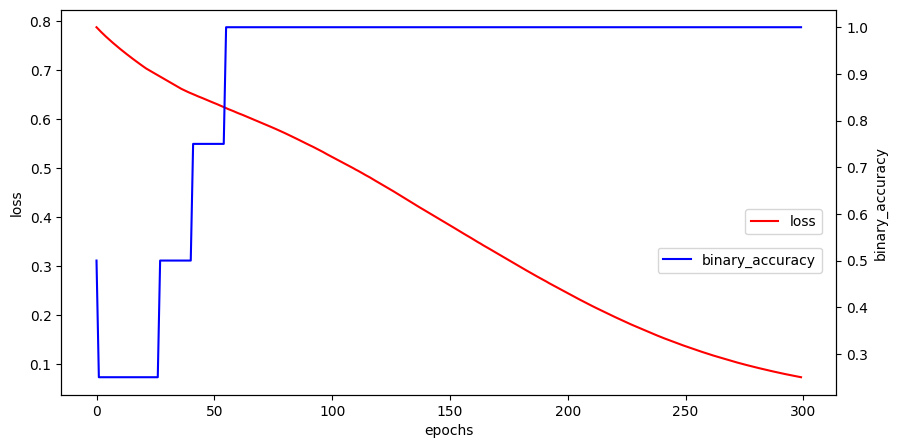

In [20]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label = 'loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(bbox_to_anchor=(0.99,0.5))
acc_ax = loss_ax.twinx() # loss_ax 와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='binary_accuracy')
acc_ax.set_ylabel('binary_accuracy')
acc_ax.legend(bbox_to_anchor=(0.99,0.4))

In [21]:
# 6. 학습평가하기
score = model.evaluate(X_data, y_data)
print('loss :', score[0])
print('binary accuracy :', score[1])

1/1 [==============================] - 0s 203ms/step - loss: 0.0730 - binary_accuracy: 1.0000
loss : 0.07295361161231995
binary accuracy : 1.0


In [22]:
# 7. 모델 사용
model.predict(np.array([[0,1]]))

1/1 [==============================] - 0s 121ms/step


array([[0.90901387]], dtype=float32)